In [3]:
# Read the csv file
import pandas as pd
file_path = '../data/d_healthcare_biotechnology_sector.csv'
df = pd.read_csv(file_path)
df

,company_name,senior_ds_companies
0,UnitedHealth Group,115
1,CVS Health,112
2,Humana,78
3,Elevance Health,72
4,AstraZeneca,65
5,IQVIA,63
6,Syneos Health,55
7,Johnson & Johnson,45
8,J&J Family of Companies,40
9,Pfizer,38


In [4]:
"""
Remove the duplicates from the DataFrame
Duplicates: 1. CVS Pharmacy is a subsidiary of CVS Health, 
            2. Syneos Health - USA refers to the U.S. operations of Syneos Health, and
            3. J&J Family of Companies" is an alternative way to refer to Johnson & Johnson.
""" 
companies_to_remove = ['CVS Pharmacy', 'Syneos Health - USA', 'J&J Family of Companies']
"""
Create the Boolean Mask
df['company_name'].isin(companies_to_remove) --> True = Rows where the company name is in the list.
"~" --> Mask Inversion --> False = Rows where the company name is in the list (these rows will be removed)
"""
mask = ~df['company_name'].isin(companies_to_remove)
cleaned_df = df[mask] # Create a new DataFrame without the specified companies
cleaned_df = cleaned_df.reset_index(drop=True) # Reset the index
cleaned_df

,company_name,senior_ds_companies
0,UnitedHealth Group,115
1,CVS Health,112
2,Humana,78
3,Elevance Health,72
4,AstraZeneca,65
5,IQVIA,63
6,Syneos Health,55
7,Johnson & Johnson,45
8,Pfizer,38
9,Novo Nordisk,37


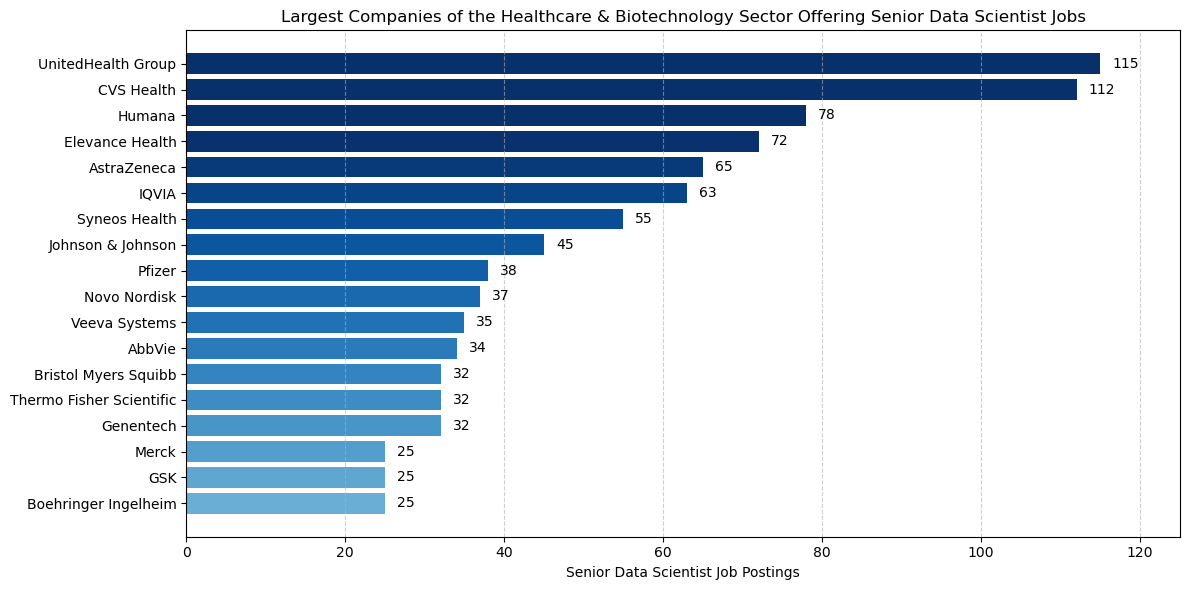

In [5]:
# Change to ascending order (the graph is populated from bottom up)
import matplotlib.pyplot as plt
import numpy as np

sorted_df = cleaned_df.sort_values(by='senior_ds_companies', ascending=True)

# Horizontal Bar Chart Design

# Figure Size & Palette
plt.figure(figsize=(12, 6))
# Create a color gradient scheme for the different skills
gradient_colors = plt.cm.Blues(np.linspace(0.5, 1.1, 18))  # Blue gradient

# Create the horizontal bar chart
plt.barh(sorted_df['company_name'], sorted_df['senior_ds_companies'],color=gradient_colors)
 
# Add labels and title 
plt.xlabel('Senior Data Scientist Job Postings')
plt.title('Largest Companies of the Healthcare & Biotechnology Sector Offering Senior Data Scientist Jobs')

# Display percentage values on the bars
for index, value in enumerate(sorted_df['senior_ds_companies']): # enumerate() returns the index and value for each entry in the 'senior_ds_companies' column
    plt.text(value + 1.5, index, value, va='center') #For each company it places a text label on the plot
    # X-Axis Position = value + 5 (to offset the text from the bar)
    # Y-Axis Position = index (at the position of each company on the y-axis)
    #Alignment = va='center' (center the text vertically relative to its y-coordinate)

# Show the plot
plt.xlim(0, max(sorted_df['senior_ds_companies']) + 10)  # Adjust x-axis limit for better visibility
plt.grid(axis='x', linestyle='--', alpha=0.6) #Grid along the x-axis, dashed lines, and transparency level to 0.6 (not fully opaque)
plt.tight_layout()  # Adjust layout to prevent clipping of labels (optimizes the layout of the elements within the figure)
plt.savefig("../assets/healthcare_biotechnology_sector.pdf", format='pdf', dpi=300, bbox_inches='tight') #tight layout around the figure (ensures that any extra whitespace around the figure is minimized when saving it)
plt.show()